# Problem: Reflection unitaries

In the previous two problems, the output of a classical Boolean function is computed into an additional qubit. However, quantum computers can also compute Boolean functions into the phase of a quantum state, which we explore in this problem.

Suppose $f:\{0,1\}^n\rightarrow\{0,1\}$ is a Boolean function. For $\beta \in R$, define an $\textit{n}$-qubit unitary

$$
\large
\begin{equation*}
    U_f(\beta) = \sum_{x\in\{0,1\}^n} e^{i\beta f(x)}|x\rangle \langle x|
\tag{1}
\end{equation*}
$$
When $U_f$ is applied to computational basis state $|x\rangle$ it adds a phase $e^{i\beta}$ if $f(x) = 1$ and does  nothing otherwise.<br>
Your goal in this problem is to implement $U_f$ for a variety of functions with $\textit{n}$= 3
<h3>
\begin{align}
f_0(x_1x_2x_3)&=0,\quad f_1(x_1x_2x_3)=x_1x_2x_3,\quad f_2(x_1x_2x_3)=x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3),\\\nonumber
f_3(x_1x_2x_3)&=x_1+x_2+x_3+x_1x_2x_3,\quad f_4(x_1x_2x_3)=x_1+x_2+x_3.
\tag{2}
\end{align}
</h3>
Here, $f_m$ has m solutions to f(x) = 1. For instance,$f_2$ evaluates to 1 on the inputs x = 000 and x = 111.You may use $A \geq 0$ ancilla qubits in your implementation initialized in $∣0^A\rangle$ as long as they are returned to $∣0^A\rangle$ by the end of the computation. Two examples are shown in Fig.2 for n= 2 functions.

![icpc_reflections.png](icpc_reflections.png "ShowMyImage")

The "reflection unitaries" $U_f(\beta)$ are useful in some quantum algorithms. In particular, the famous Grover search algorithm uses these reflections to outperform classical search algorithms for unstructured lists.

In [4]:
def C2X(circ, control_qubit1, control_qubit2, target_qubit):    
    circ.ch(control_qubit1, target_qubit)
    circ.cz(control_qubit2, target_qubit)
    circ.ch(control_qubit1, target_qubit)
    
def C2X(circ, control_qubit1, control_qubit2, target_qubit):    
    
    circ.ch(control_qubit1, target_qubit)
    circ.cz(control_qubit2, target_qubit)
    circ.ch(control_qubit1, target_qubit)
    
    return circ
def CS():
    circ = QuantumCircuit(1)
    circ.s(0)
    circ = circ.control(1)
    
    return circ

def CS_dagger():
    circ = QuantumCircuit(1)
    circ.sdg(0)
    circ = circ.control(1)
    
    return circ

def CCZ(circ, c1, c2, t):
    circ = circ.compose(CS(), [c2, t])
    circ.cx(c1, c2)
    circ = circ.compose(CS_dagger(), [c2, t])
    circ.cx(c1, c2)
    circ = circ.compose(CS(), [c1, t])

    return circ

def C3X(circ, c1, c2, c3, t):

    circ.ch(c1, t)

#     circ.barrier()

    circ = CCZ(circ, c2, c3, t)

#     circ.barrier()

    circ.ch(c1, t)

    return circ

def C4X(circ, c1, c2, c3, c4, t):

    circ.ch(c1, t)
    circ.h(t)
    circ.mct([c2, c3, c4], t)
    circ.h(t)
    circ.ch(c1, t)
    return circ

def C5X(circ, c1, c2, c3, c4, c5, t):

    circ.ch(c1, t)
    circ.h(t)
    circ.mct([c2, c3, c4, c5], t)
    circ.h(t)
    circ.ch(c1, t)
    return circ

<h1>
    $f_m$ for m = 0

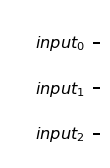

In [5]:
# Importing the qiskit module
from qiskit import *

q0 =  3  # number of required qubits
a0 = 0   # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_0(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below ######### 
    
    
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3a = Circuit_0(q0,a0,beta)

<h1>
    $f_m$ for m = 1

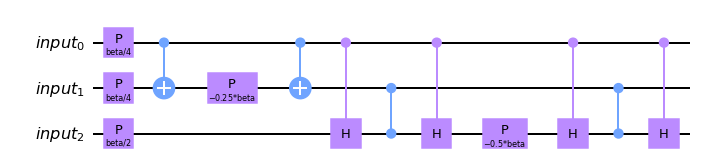

In [6]:
# Importing the qiskit module
from qiskit import *

q1 = 3  # number of required qubits
a1 =  0 # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given Circuits
def Circuit_1(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating Circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating Circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you Circuit below #########   
    Circ.p(beta/4, [0, 1])
    Circ.p(beta/2, 2)
    # First switch
    Circ.cx(0, 1)
    Circ.p(-beta/4, 1)
    Circ.cx(0, 1)
    # Second switch
#     Circ.ccx(0, 1, 2)
    Circ = C2X(Circ, 0,1,2)
    Circ.p(-beta/2, 2)
    
#     Circ.cx(2, 1)
#     Circ.cx(2, 1)
#     Circ.barrier()
    Circ = C2X(Circ, 0,1,2)
    
    ########################################
    
    # Uncomment to draw quantum Circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the Circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled Circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3b = Circuit_1(q1,a1,beta)

<h1>
    $f_m$ for m = 2

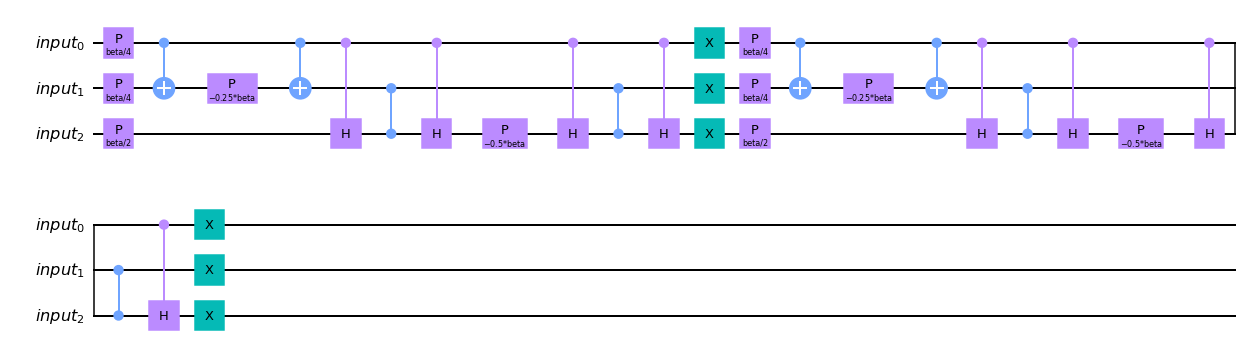

In [12]:
# Importing the qiskit module
from qiskit import *

q2 =  3 # number of required qubits
a2 =  0 # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_2(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    Circ.p(beta/4, [0, 1])
    Circ.p(beta/2, 2)
    # First switch
    Circ.cx(0, 1)
    Circ.p(-beta/4, 1)
    Circ.cx(0, 1)
    # Second switch
    Circ = C2X(Circ, 0,1,2)
    Circ.p(-beta/2, 2)
    # WTF Barrier eliminates weird phase what in the actual fuck qiskit
    Circ = C2X(Circ, 0,1,2)
    Circ.x([0, 1, 2])
    Circ.p(beta/4, [0, 1])
    Circ.p(beta/2, 2)
    # Third switch
    Circ.cx(0, 1)
    Circ.p(-beta/4, 1)
    Circ.cx(0, 1)
    # Fourth switch
    Circ = C2X(Circ, 0,1,2)
    Circ.p(-beta/2, 2)
    # WTF Barrier eliminates weird phase what in the actual fuck qiskit
    Circ = C2X(Circ, 0,1,2)
    Circ.x([0, 1, 2])
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3c = Circuit_2(q2,a2,beta)

<h1>
    $f_m$ for m = 3

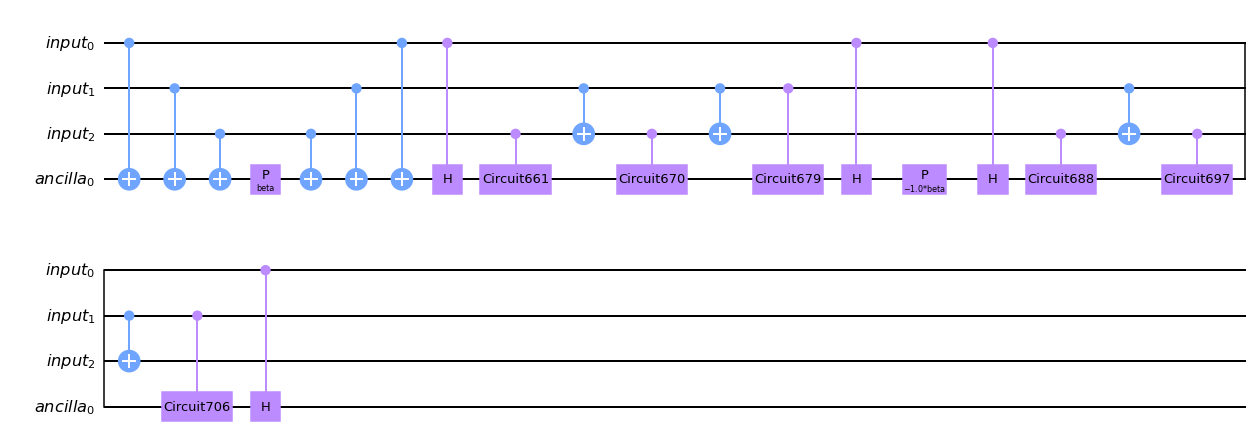

In [16]:
# Importing the qiskit module
from qiskit import *

q3 = 3  # number of required qubits
a3 = 1  # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_3(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    Circ.cx(0, 3)
    Circ.cx(1, 3)
    Circ.cx(2, 3)
    Circ.p(beta, 3)
    Circ.cx(2, 3)
    Circ.cx(1, 3)
    Circ.cx(0, 3)
#     Circ.mct([0,1,2],3)
    Circ = C3X(Circ, 0,1,2,3)
    Circ.p(-beta, 3)
    Circ = C3X(Circ, 0,1,2,3)
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3d = Circuit_3(q3,a3,beta)

<h1>
    $f_m$ for m = 4

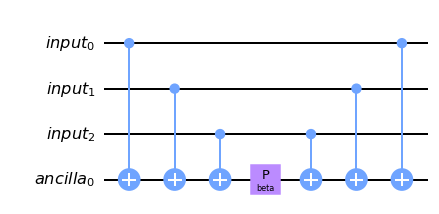

In [17]:
# Importing the qiskit module
from qiskit import *

q4 = 3  # number of required qubits
a4 =  1 # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_4(q, a, beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')   
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    Circ.cx(0, 3)
    Circ.cx(1, 3)
    Circ.cx(2, 3)
    Circ.p(beta, 3)
    Circ.cx(2, 3)
    Circ.cx(1, 3)
    Circ.cx(0, 3)

    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3e = Circuit_4(q4,a4,beta)

### Grader

In [18]:
# all_circuits = [qc_3a, qc_3b, qc_3c, qc_3d, qc_3e]
from qc_grader import grade_ex3
all_circuits = [qc_3a, qc_3b, qc_3c, qc_3d, qc_3e]

grade_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 937.
Feel free to submit your answer.



# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ For the $m^{th}$ circuit, let $G_m$ be the number of 2-qubit gates, $D_m$ the depth,  and $A_m$ the number of ancillas. Your solution quality will be judged on the following cost metric: 
$$\text{Cost} = \sum_{m=0}^4 10G_m + D_m(n+A_m)$$ .
The reasoning behind this metric relates to the error rates in quantum circuits. Notice that $D_m(n+A_m)$ is roughly the spacetime volume of the circuit (the collective number of timesteps qubits participating in thecircuit must be kept alive). Also, two-qubit gates are roughly (optimistically) 10 times as likely to fail as idling qubits. Thus, $Cost_n$ is roughly proportional to error rate of all of your circuits combined.

### Submission for evaluation 

In [19]:
## Uncomment and run the following code to submit
from qc_grader import submit_ex3

submit_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Submitting your answer for ex3. Please wait...
Success 🎉! Your answer has been submitted.
